# Day 5  | First week task

Lets put our knowledge into action by tackling following tasks: 


- Load time lapse fluorescence data from Matlab file "task1.mat" that is in the main course folder. Data are stored in two matrices: *x_norm* contains trajectories and *t* is a time vector

- Plot (with labels) example cell tracetories | Tip: transpose the loaded data to get first dimension the same

- Find peaks in each trajectories usin scipy library functions | Tip: Search for suitable functions in scipy manual

- Calculate amplitude and period of oscillations | Tip: the period of oscillation is a distance between peaks in a single cell trajectory

- Draw histograms of period distribution

- Plot amplitude vs period with labels 

- Select ten cell trajectiories with the smallest periods and plot those as a heat map 

- Perform frequency analysis using FFT Fourier transformation and identify a dominant frequency in the signal


In [1]:
#import necessary tools, please add yourself here whatever you think you might need to solve the task

#basics
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plotter
from scipy.fftpack import fft
from scipy.signal import find_peaks


data = sio.loadmat('./task1.mat')

x = np.transpose(data['x_norm'])
time = np.transpose(data['t'])
x.shape #lineas, columnas
#x.size #cantidad de elementos
#x



(101, 501)

(101, 1)

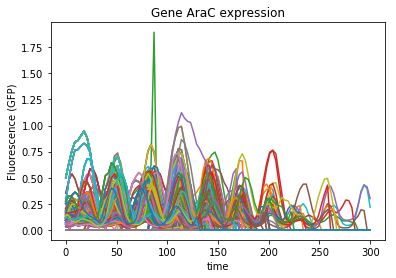

In [2]:
plotter.plot(time, x) # all of the cell trajectories into the same plot

plotter.title("Gene AraC expression")
plotter.xlabel('time')
plotter.ylabel('Fluorescence (GFP)') 

time.shape

#está bien aunque el tiempo llegue a mas de 140, la cosa es que a partir de ahi las trayectorias son 0

In [3]:
x.shape

(101, 501)

In [35]:
peaks = find_peaks(x[:,1])



In [357]:
from scipy.signal import find_peaks

picos = []

for i in range(x.shape[1]):
    peaks= find_peaks(x[:, i])
    picos.append(x[:,i][peaks[0]])
    
       
#print(picos) 

            

In [390]:

amp = []

for i in picos:
    peaks = np.nanmean(i)#mean amplitudes of each cel
    amp.append(peaks)
    
       
print(amp) 



[0.21722033416977998, 0.2921703407589957, 0.26584087219100255, 0.35456352765321375, nan, 0.21191484377323375, 0.16296326530612243, 0.13643791612796194, 0.3973483648785421, 0.2104854305999021, 0.2116058282857221, 0.27386691426802845, 0.2129761295822677, 0.185417804517504, 0.274067105632403, 0.26253877613670157, 0.185417804517504, 0.2997898039497648, 0.32483556744548303, 0.33375937432038333, 0.3737434636602368, 0.24887625338504538, nan, 0.2703485022640195, 0.3314886722352299, 0.21515548257969036, 0.3181303072976338, 0.23353115956780557, 0.1529942563628625, 0.207952404360367, 0.23410155710561542, 0.297636670485846, 0.7009034136057573, 0.3042165726082998, 0.29742299281014367, nan, 0.09388188476349947, 0.5291104045625777, 0.23160539776838718, nan, 0.21191484377323375, 0.3462679240528023, 0.30014498980737164, 0.2948880384936263, 0.03878478964401295, 0.1056137809996325, 0.185417804517504, 0.3161367320078999, 0.3704286983672806, 0.27916602348353786, 0.18316148578459246, 0.1056137809996325, 0.2

/home/osboxes/Anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """


In [464]:
amplitude=np.nan_to_num(amp)
amplitude

array([0.21722033, 0.29217034, 0.26584087, 0.35456353, 0.        ,
       0.21191484, 0.16296327, 0.13643792, 0.39734836, 0.21048543,
       0.21160583, 0.27386691, 0.21297613, 0.1854178 , 0.27406711,
       0.26253878, 0.1854178 , 0.2997898 , 0.32483557, 0.33375937,
       0.37374346, 0.24887625, 0.        , 0.2703485 , 0.33148867,
       0.21515548, 0.31813031, 0.23353116, 0.15299426, 0.2079524 ,
       0.23410156, 0.29763667, 0.70090341, 0.30421657, 0.29742299,
       0.        , 0.09388188, 0.5291104 , 0.2316054 , 0.        ,
       0.21191484, 0.34626792, 0.30014499, 0.29488804, 0.03878479,
       0.10561378, 0.1854178 , 0.31613673, 0.3704287 , 0.27916602,
       0.18316149, 0.10561378, 0.21191484, 0.2275461 , 0.28586096,
       0.43085518, 0.1854178 , 0.22644603, 0.37152309, 0.27386691,
       0.20192059, 0.24023171, 0.33500027, 0.26898629, 0.        ,
       0.        , 0.14677161, 0.32387777, 0.21935282, 0.17717354,
       0.34288974, 0.21785568, 0.25775764, 0.26159277, 0.34605

In [377]:

tiempos = []

for i in range(x.shape[1]):
    peaks= find_peaks(x[:, i])
    tiempos.append(peaks[0]*3)
print(tiempos)



[array([ 9, 24, 42, 81, 99]), array([ 18,  51,  81, 111, 132]), array([ 21,  51,  78, 108, 141, 171]), array([84]), array([], dtype=int64), array([ 3, 18, 45, 51, 57, 81]), array([84]), array([ 6, 24, 39, 45, 66, 81]), array([ 18,  48,  81, 111, 144]), array([ 27,  48,  87, 102]), array([ 84, 108]), array([87]), array([84]), array([24, 48, 78]), array([18, 48, 81]), array([ 3, 24, 57, 75, 87]), array([24, 48, 78]), array([ 18,  48,  84, 111, 138]), array([ 18,  51,  84, 114, 132]), array([18, 51, 81]), array([ 3, 24, 57, 90]), array([ 24,  51,  84, 105]), array([], dtype=int64), array([42, 48, 69]), array([ 18,  51,  81, 114, 135]), array([27, 51, 69, 84]), array([ 15,  21,  51,  84, 114]), array([ 24,  48,  60,  78, 102]), array([ 3, 21, 51, 75]), array([ 9, 24, 45, 78]), array([ 84, 108]), array([ 9, 45, 78, 87]), array([ 3, 24, 54, 87]), array([15, 21, 51, 87]), array([24, 51, 84]), array([], dtype=int64), array([  6,  21,  48,  75, 108, 129]), array([ 9, 45, 84]), array([27, 45, 87

In [378]:
suma=[]
media=[]
for item in tiempos: #for each sublist of the list"tiempos"
    for i in range(len(item)-1): #for the index of each sublist (-1 porque al final intenta coger un numero más de los que hay por el i+1 del loop)
        a=item[i+1]-item[i] #substract the number in the left to the number in the right  and store the results in the list "suma"
        suma.append(a)
    #print(suma)
    media.append(np.nanmean(suma))#mean of each sublist subtractions results     
    #print(media)
    suma.clear() #we clean the list because otherwise, the values of different sublists would be accumulated and the averages would be wrong

print(media)


[22.5, 28.5, 30.0, nan, nan, 15.6, nan, 15.0, 31.5, 25.0, 24.0, nan, nan, 27.0, 31.5, 21.0, 27.0, 30.0, 28.5, 31.5, 29.0, 27.0, nan, 13.5, 29.25, 19.0, 24.75, 19.5, 24.0, 23.0, 24.0, 26.0, 28.0, 24.0, 30.0, nan, 24.6, 37.5, 30.0, nan, 15.6, 36.0, 34.5, 39.0, nan, 24.0, 27.0, 25.285714285714285, 26.142857142857142, 28.5, 25.0, 24.0, 15.6, 20.0, 20.25, 30.0, 27.0, 30.0, 31.5, nan, 18.0, 27.0, 39.0, 30.0, nan, nan, 27.0, 32.0, 28.0, 26.0, 30.75, 27.0, 21.0, 19.5, 31.0, 30.0, 34.0, 29.0, 30.0, nan, 22.5, 26.0, 27.0, 27.0, 30.75, 27.0, 32.0, 26.25, nan, 27.0, 23.0, 30.0, 25.5, 25.5, 25.5, 30.0, 26.0, 33.0, nan, 18.75, 29.0, nan, 25.5, 27.0, 31.0, 33.0, 35.0, 30.0, 24.75, 26.4, nan, nan, 32.0, 30.0, 24.0, nan, 24.0, 29.0, 32.25, 40.5, 24.0, 22.0, 27.428571428571427, 30.0, 28.0, nan, nan, nan, 28.0, 34.0, 37.0, 24.75, nan, 23.25, 22.5, 18.0, 25.5, 21.0, 30.0, 31.0, 28.2, 28.5, 12.0, 22.5, nan, nan, 25.5, 18.0, 24.0, 30.0, 12.0, 28.0, 25.0, 26.0, 21.5, nan, 19.0, 31.0, 24.75, 30.33333333333333

/home/osboxes/Anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  


In [401]:

truemeans=np.nan_to_num(media, int)
print(truemeans)
       

[22.5        28.5        30.          0.          0.         15.6
  0.         15.         31.5        25.         24.          0.
  0.         27.         31.5        21.         27.         30.
 28.5        31.5        29.         27.          0.         13.5
 29.25       19.         24.75       19.5        24.         23.
 24.         26.         28.         24.         30.          0.
 24.6        37.5        30.          0.         15.6        36.
 34.5        39.          0.         24.         27.         25.28571429
 26.14285714 28.5        25.         24.         15.6        20.
 20.25       30.         27.         30.         31.5         0.
 18.         27.         39.         30.          0.          0.
 27.         32.         28.         26.         30.75       27.
 21.         19.5        31.         30.         34.         29.
 30.          0.         22.5        26.         27.         27.
 30.75       27.         32.         26.25        0.         27.
 23.         30

In [400]:
def vec_sort(x):
    for i in range(len(x)):
        swap = i + np.argmin(x[i:])
        (x[i], x[swap]) = (x[swap], x[i]) 
    return x
period=vec_sort(truemeans)
period= period[110:]
#print(period)



Text(0, 0.5, 'quantity of cels')

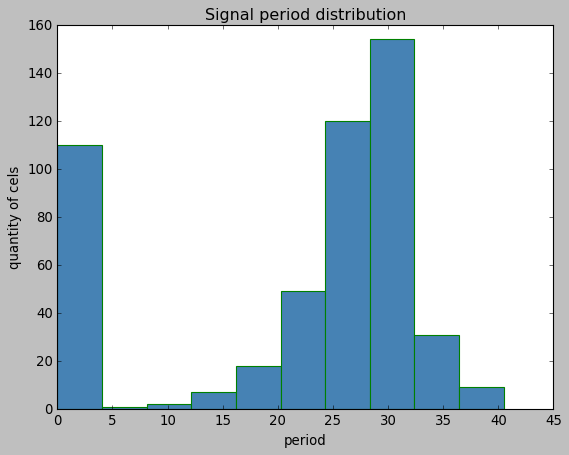

In [393]:
#Draw histograms of period distribution
plotter.hist(truemeans, bins=10, alpha=1,
         histtype='bar', color='steelblue',
         edgecolor='g');
plotter.title("Signal period distribution")
plotter.xlabel("period")
plotter.ylabel("quantity of cels") 


Text(0.5, 1.0, 'Amplitude vs Period plot')

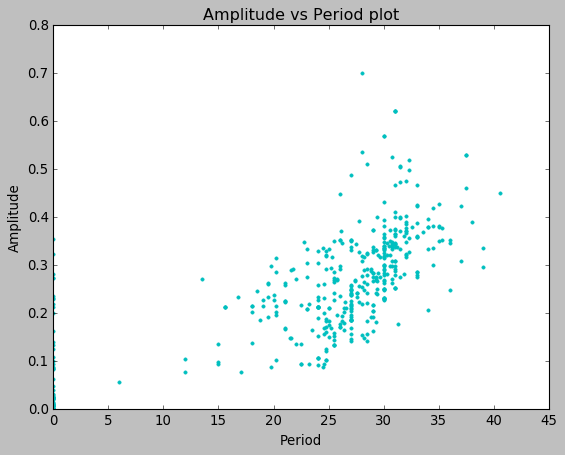

In [466]:
#Plot amplitude vs period with labels
plotter.plot(truemeans, amplitude,'.c')
plotter.ylabel("Amplitude")
plotter.xlabel("Period")
plotter.title("Amplitude vs Period plot")

In [460]:
#Select ten cell trajectiories with the smallest periods and plot those as a heat map 

#top_10 = period[:10]
#print(top_10)

#result = np.where(truemeans == 15.6) #this is to discover the index of the top_ten values
#print(result)                        #index are:415, 142, 150, 23, 7, 160, 181, 5, 40, 52
heat=[]
k=[415, 142, 150, 23, 7, 160, 181, 5, 40, 52]

for i in k:
    heat.append(x[:,i])

print(heat)




[array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.0441329 , 0.0412244 , 0.06733267, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.    

Text(0, 0.5, 'Cels')

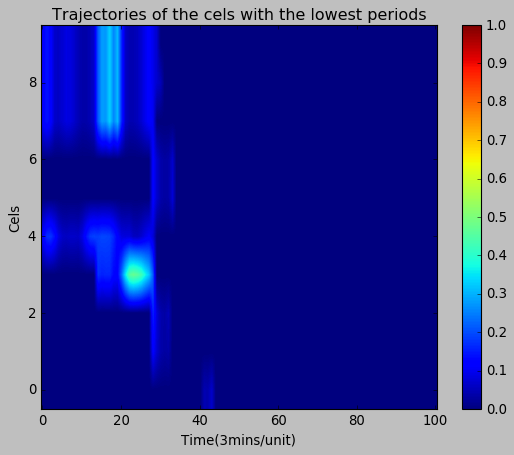

In [461]:
fig = plotter.figure()
plotter.style.use('classic')
plotter.imshow(heat, aspect='auto',origin='lower',
           cmap='jet')
plotter.colorbar()
plotter.clim(0,1)
plotter.title("Trajectories of the cels with the lowest periods")
plotter.xlabel("Time(3mins/unit)")
plotter.ylabel("Cels") 

In [38]:
# Number of sample points
N = 500
# sample spacing
T = 1.0 / 3000.0

#frequency 

F = 50

x = np.linspace(0.0, N*T, N)
y = 0.5*(1+np.sin(F * 2.0*np.pi*x))

plotter.plot(x, y)
plotter.xlabel('time')
plotter.ylabel('gene expression')
plotter.axis('tight')
# plt.grid()
plotter.show()

yf = fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
plotter.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plotter.xlabel('freq')
plotter.ylabel('power(signal)')

